# FindMed Data Training on Yolo-v8

# 3.1 Notebook – Setup & Config

In [1]:
# ============================
#  Environment Setup
# ============================

#!nvidia-smi  # make sure you see a GPU
!pip install -U ultralytics

from ultralytics import YOLO
import os, zipfile, shutil
from pathlib import Path

# 3.2 Notebook – Dataset placement

**Option A: Upload Dataset ZIP**

In [ ]:
# =========================
#  1. Upload Dataset ZIP
# =========================
from google.colab import files

uploaded = files.upload()  # upload Roboflow-exported zip

In [ ]:
# =========================
#  2. Extract Dataset
# =========================
zip_name = list(uploaded.keys())[0]
print("Extracting:", zip_name)

with zipfile.ZipFile(zip_name, 'r') as z:
    z.extractall("dataset")

!ls dataset


In [ ]:
# =========================
# 3. Verify data.yaml
# =========================
data_yaml_path = Path("dataset/data.yaml")
print(data_yaml_path.read_text())

**Option B: Mount from Drive (if you commit dataset into your repo or Drive)**

In [2]:
# =========================
#  Upload from Drive
# =========================
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

DATA_ROOT = Path('/content/drive/MyDrive/roboflow-data')
data_yaml_path = DATA_ROOT / 'data.yaml'
print(data_yaml_path.read_text())

Mounted at /content/drive
train: train/images
val: valid/images
test: test/images

names: 
  0: medicine_strip


# 3.3 Notebook – Choose model, training hyperparams

In [3]:
# ============================
# Experiment Config
# ============================

data_yaml = str(data_yaml_path)

# model choices: 'yolov8n.pt', 'yolov8s.pt', etc.
base_model = 'yolov8n.pt'
# base_model = 'yolov8s.pt'

imgsz = 512       # matches roboflow preprocessing
epochs = 15
# epochs = 150
batch = 16
project_name = 'find_med'
exp_name = 'yolo_medstrip_512'

model = YOLO(base_model)

# 3.4 Notebook – Train baseline

In [4]:
# ============================
# Train
# ============================
results = model.train(
    data=data_yaml,
    epochs=epochs,
    imgsz=imgsz,
    batch=batch,
    patience=30,          # early stopping
    project=project_name,
    name=exp_name,
    optimizer='auto',
    cos_lr=True,
    verbose=True
)

results

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/drive/MyDrive/roboflow-data/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_medstrip_51213, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=30, per

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7881bd256ff0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# 3.5 Notebook – Evaluate & visualize

Best checkpoint: yolov8n.pt
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 5.1±9.4 ms, read: 4.5±6.2 MB/s, size: 46.1 KB)
val: Scanning /content/drive/MyDrive/roboflow-data/valid/labels.cache... 164 images, 10 backgrounds, 1 corrupt: 100% ━━━━━━━━━━━━ 164/164 193.3Kit/s 0.0s
val: /content/drive/MyDrive/roboflow-data/valid/images/PXL_20251130_155206312_jpg.rf.cd94174344747d9e273d1281d8ba0584.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.166      1.1688]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 2.5s/it 27.9s
                   all        163        181      0.866      0.956      0.955      0.808
Speed: 1.2ms preprocess, 151.2ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /content/runs/detect/val
ultraly

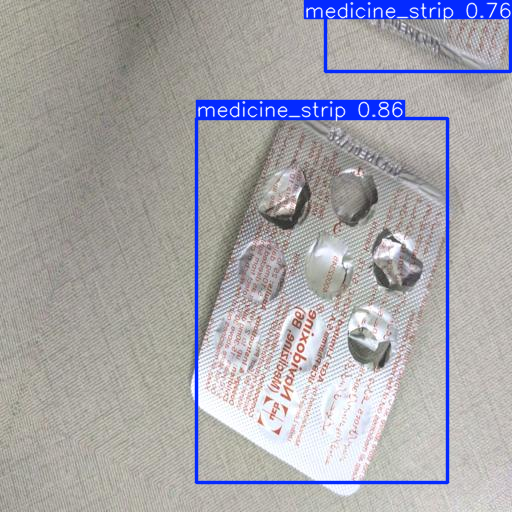

Image: /content/drive/MyDrive/roboflow-data/valid/images/luzy2_aug_14_png.rf.f7b1f15cf15a8bc9526cd2be1ec8290f.jpg

image 1/1 /content/drive/MyDrive/roboflow-data/valid/images/luzy2_aug_14_png.rf.f7b1f15cf15a8bc9526cd2be1ec8290f.jpg: 512x512 1 medicine_strip, 178.6ms
Speed: 7.4ms preprocess, 178.6ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 512)


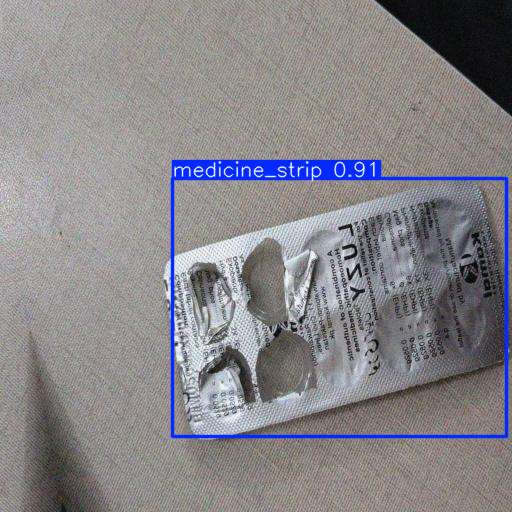

Image: /content/drive/MyDrive/roboflow-data/valid/images/Ansaid2_aug_119-14-_png.rf.f5fa2116f175f272372d2616048e64e7.jpg

image 1/1 /content/drive/MyDrive/roboflow-data/valid/images/Ansaid2_aug_119-14-_png.rf.f5fa2116f175f272372d2616048e64e7.jpg: 512x512 1 medicine_strip, 181.0ms
Speed: 3.9ms preprocess, 181.0ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 512)


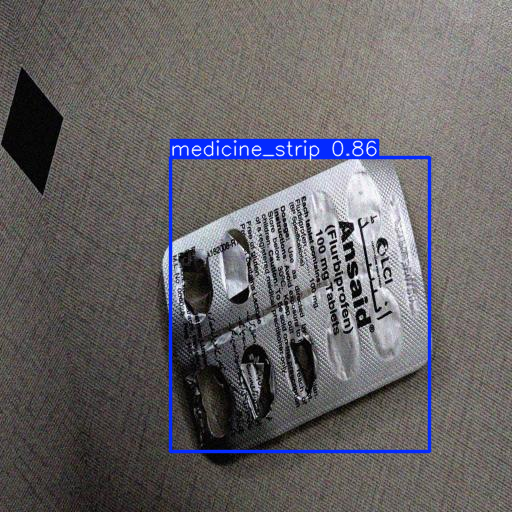

Image: /content/drive/MyDrive/roboflow-data/valid/images/Ansaid2_aug_27_png.rf.30c4247e6a5ee857d772bcc5dc46b731.jpg

image 1/1 /content/drive/MyDrive/roboflow-data/valid/images/Ansaid2_aug_27_png.rf.30c4247e6a5ee857d772bcc5dc46b731.jpg: 512x512 3 medicine_strips, 200.1ms
Speed: 2.4ms preprocess, 200.1ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 512)


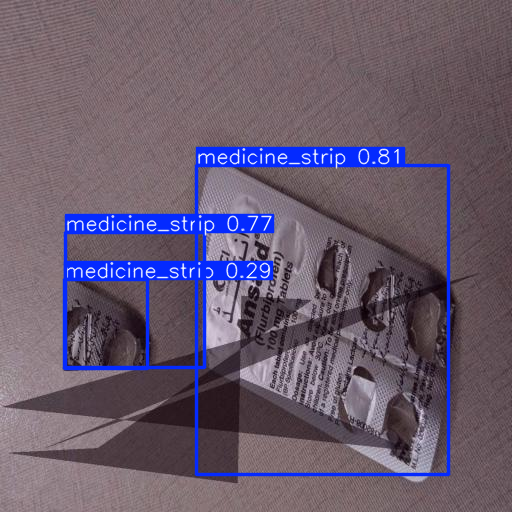

Image: /content/drive/MyDrive/roboflow-data/valid/images/luzy2_aug_118-5-_png.rf.33f5142ce06469abfb129ce1809f0375.jpg

image 1/1 /content/drive/MyDrive/roboflow-data/valid/images/luzy2_aug_118-5-_png.rf.33f5142ce06469abfb129ce1809f0375.jpg: 512x512 4 medicine_strips, 193.8ms
Speed: 2.8ms preprocess, 193.8ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 512)


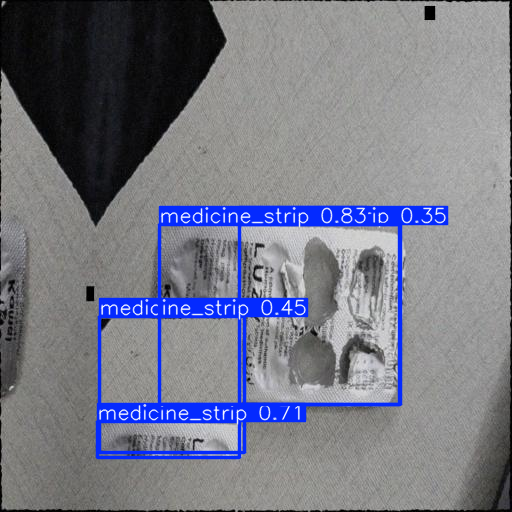

In [6]:
# ============================
#  Validate & Inspect Results
# ============================
best_ckpt = model.ckpt_path  # or manually: f"runs/detect/{exp_name}/weights/best.pt"
print("Best checkpoint:", best_ckpt)

# validation metrics
metrics = model.val(data=data_yaml, imgsz=imgsz, split='val')  # or 'test'
print(metrics)

# visualize predictions on a few images
import random, glob

img_paths = glob.glob(str(DATA_ROOT / 'valid' / 'images' / '*'))
sample_imgs = random.sample(img_paths, min(5, len(img_paths)))

for img in sample_imgs:
    print("Image:", img)
    res = model.predict(source=img, imgsz=imgsz, conf=0.25, save=False)
    res[0].show()

# 3.6 Notebook – Export weights for inference

**choosing option 1:** Plain `.pt` weights (easiest for Python ultralytics inference).

In [7]:
# ============================
# 1. Export Weights
# ============================
best_ckpt = model.ckpt_path
print("Best checkpoint:", best_ckpt)

# Export to ONNX (optional)
#model.export(format='onnx', imgsz=imgsz)  # saves in same project/exp directory

Best checkpoint: yolov8n.pt


In [22]:
# ==================================
# 2. Compress best.pt for download
# ==================================
import shutil, os

# local_best = str(Path(f"find_med/{exp_name}/weights/best.pt"))
local_best = str(Path(f"find_med/{exp_name + '13'}/weights/best.pt"))
print("Best model (local) path:", local_best)

!ls -lh "{local_best}"

Best model (local) path: find_med/yolo_medstrip_51213/weights/best.pt
-rw-r--r-- 1 root root 6.0M Dec 11 02:15 find_med/yolo_medstrip_51213/weights/best.pt


In [23]:
# ============================
#  download best.pt file
# ============================
from google.colab import files
files.download(str(local_best))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Note:** after download, then you'll put this file into your repo at:

```
ai/weights/medstrip_yolo_best.pt
```
and reference it in your inference code. DONE!!